In [1]:
import pymssql
import pandas as pd

Read In Tables From Database

In [2]:
database = "group4"
mortalityTable = "dbo.mortality"
underweightTable = "dbo.underweight"
waterTable = "dbo.water"
malariaTable = "dbo.malaria"
tbTable = "dbo.tb"
user = "group4user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

In [3]:
conn = pymssql.connect(server, user, password, database)

dfMortal = pd.read_sql(f"SELECT * FROM {mortalityTable}", conn)
dfUnder = pd.read_sql(f"SELECT * FROM {underweightTable}", conn)
dfWater = pd.read_sql(f"SELECT * FROM {waterTable}", conn)
dfMalaria = pd.read_sql(f"SELECT * FROM {malariaTable}", conn)
dfTb = pd.read_sql(f"SELECT * FROM {tbTable}", conn)

display(dfMortal)
display(dfUnder)
display(dfWater)
display(dfMalaria)
display(dfTb)

,Country,Year,PercentMortality
0,AFG,2000,31.6
1,AFG,2001,30.7
2,AFG,2002,29.2
3,AFG,2003,28.6
4,AFG,2004,28.2
...,...,...,...
3106,ZWE,2012,40.7
3107,ZWE,2013,38.3
3108,ZWE,2014,35.8
3109,ZWE,2015,34.6


,Country,PercentUnderweightAdults,Year
0,AFG,22.000000,2000
1,AFG,21.600000,2001
2,AFG,21.299999,2002
3,AFG,20.900000,2003
4,AFG,20.600000,2004
...,...,...,...
3293,ZWE,8.300000,2012
3294,ZWE,8.200000,2013
3295,ZWE,8.100000,2014
3296,ZWE,8.000000,2015


,Country,Year,PercentWater
0,AFG,2000,28.171419
1,AFG,2001,28.199369
2,AFG,2002,30.236380
3,AFG,2003,32.273720
4,AFG,2004,34.328560
...,...,...,...
4111,ZWE,2016,64.468964
4112,ZWE,2017,63.996620
4113,ZWE,2018,63.538769
4114,ZWE,2019,63.094959


,Country,Year,PercentMalaria
0,ABW,2000,0.0
1,ABW,2001,0.0
2,ABW,2002,0.0
3,ABW,2003,0.0
4,ABW,2004,0.0
...,...,...,...
4955,ZWE,2015,9.7
4956,ZWE,2016,6.8
4957,ZWE,2017,11.7
4958,ZWE,2018,5.5


,Country,Year,PercentTb
0,AFG,2000,0.190
1,AFG,2001,0.189
2,AFG,2002,0.189
3,AFG,2003,0.189
4,AFG,2004,0.189
...,...,...,...
3459,ZWE,2016,0.233
3460,ZWE,2017,0.221
3461,ZWE,2018,0.210
3462,ZWE,2019,0.199


Joined Tables To Create Features Table

In [4]:
joined = dfWater.merge(dfUnder, on = ["Country", "Year"]) \
                .merge(dfMortal, on = ["Country", "Year"]) \
                .merge(dfMalaria, on = ["Country", "Year"]) \
                .merge(dfTb, on = ["Country", "Year"])

display(joined)

,Country,Year,PercentWater,PercentUnderweightAdults,PercentMortality,PercentMalaria,PercentTb
0,AFG,2000,28.171419,22.000000,31.6,8.2,0.190
1,AFG,2001,28.199369,21.600000,30.7,7.9,0.189
2,AFG,2002,30.236380,21.299999,29.2,7.9,0.189
3,AFG,2003,32.273720,20.900000,28.6,6.8,0.189
4,AFG,2004,34.328560,20.600000,28.2,3.7,0.189
...,...,...,...,...,...,...,...
3083,ZWE,2012,66.491180,8.300000,40.7,5.7,0.355
3084,ZWE,2013,65.966469,8.200000,38.3,8.1,0.304
3085,ZWE,2014,65.454109,8.100000,35.8,10.1,0.278
3086,ZWE,2015,64.954933,8.000000,34.6,9.7,0.242


Split Set into Training and Testing Sets

In [56]:
from sklearn.model_selection import train_test_split
X = joined.drop(["Country", "Year", "PercentMortality"], axis = 1)
y = joined["PercentMortality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

Run Grid Search on Best Performing Model from Manual Tests

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
# Capped Number of Estimators to 150 so training times don't get too long
estimators = np.linspace(60, 150, 10, dtype = int)
parameters = {'random_state': [0], 'n_estimators': estimators,
              'criterion': ["squared_error", "absolute_error"]}
clf = GridSearchCV(ExtraTreesRegressor(), parameters, verbose = 4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=squared_error, n_estimators=150, random_state=0;, score=0.950 total time=   0.6s
[CV 2/5] END criterion=squared_error, n_estimators=150, random_state=0;, score=0.933 total time=   0.7s
[CV 3/5] END criterion=squared_error, n_estimators=150, random_state=0;, score=0.960 total time=   0.6s
[CV 4/5] END criterion=squared_error, n_estimators=150, random_state=0;, score=0.946 total time=   0.6s
[CV 5/5] END criterion=squared_error, n_estimators=150, random_state=0;, score=0.968 total time=   0.6s
[CV 1/5] END criterion=absolute_error, n_estimators=150, random_state=0;, score=0.946 total time=   8.0s
[CV 2/5] END criterion=absolute_error, n_estimators=150, random_state=0;, score=0.935 total time=   7.8s
[CV 3/5] END criterion=absolute_error, n_estimators=150, random_state=0;, score=0.961 total time=   7.2s
[CV 4/5] END criterion=absolute_error, n_estimators=150, random_state=0;, score=0.947 total time=   6.4s


GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'n_estimators': [150], 'random_state': [0]},
             verbose=4)

Generate Score and Actual v Predicted Graph

In [8]:
import matplotlib.pyplot as plt

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.9654041808432126


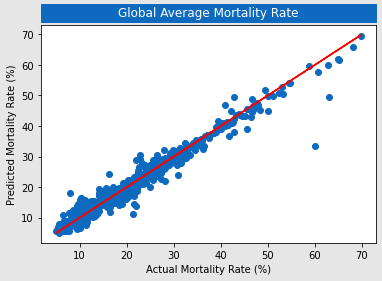

In [58]:
bclf = clf.best_estimator_
print(bclf.get_params())
bclf.fit(X_train, y_train)
print(bclf.score(X_test, y_test))
prediction = bclf.predict(X_test)

fig, ax = plt.subplots(1, 1)
fig.patch.set_facecolor("#E6E6E6")

plt.scatter(y_test, prediction, color = "#0D6ABF")
plt.plot(y_test, y_test, color = "red")

title = ax.set_title("Global Average Mortality Rate", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
title._bbox_patch._mutation_aspect = 0.03
title.get_bbox_patch().set_boxstyle("square", pad = 6.45)
ax.set_xlabel("Actual Mortality Rate (%)")
ax.set_ylabel("Predicted Mortality Rate (%)")

plt.show()
fig.savefig("../Presentation Materials/extratrees_predicted_vs_actual.svg")

In [59]:
asdf = pd.DataFrame(y_test)
asdf["prediction"] = prediction
asdf["squared_error"] = pow((asdf["PercentMortality"] - asdf["prediction"]), 2)
asdf = asdf.join(joined.drop("PercentMortality", axis = 1))

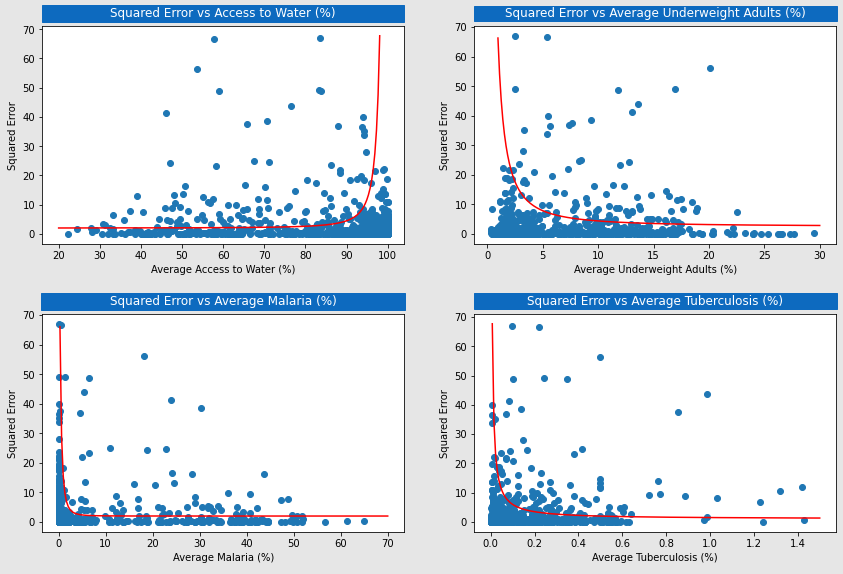

In [211]:
fig = plt.figure(figsize = (12, 8))
fig.set_facecolor("#E6E6E6")
figs = fig.subfigures(2, 2)

ax1 = figs[0][0].subplots(1, 1)
ax2 = figs[0][1].subplots(1, 1)
ax3 = figs[1][0].subplots(1, 1)
ax4 = figs[1][1].subplots(1, 1)

xw = np.linspace(20, 98.05, 200)
yw = np.array([250 / pow((x - 100), 2) + 2 for x in xw])
xu = np.linspace(0.96, 30, 200)
yu = np.array([60 / pow(x, 1.5) + 2.5 for x in xu])
xm = np.linspace(0.28, 70, 200)
ym = np.array([70 / pow((x + 0.75), 3) + 2 for x in xm])
xt = np.linspace(0.0075, 1.5, 200)
yt = np.array([1 / (2 * x) + 1 for x in xt])

ax1.scatter(asdf[asdf["squared_error"] < 100]["PercentWater"],
            asdf[asdf["squared_error"] < 100]["squared_error"])
ax1.plot(xw, yw, color = "red")
ax2.scatter(asdf[asdf["squared_error"] < 100]["PercentUnderweightAdults"],
            asdf[asdf["squared_error"] < 100]["squared_error"])
ax2.plot(xu, yu, color = "red")
ax3.scatter(asdf[asdf["squared_error"] < 100]["PercentMalaria"],
            asdf[asdf["squared_error"] < 100]["squared_error"])
ax3.plot(xm, ym, color = "red")
ax4.scatter(asdf[asdf["squared_error"] < 100]["PercentTb"],
            asdf[asdf["squared_error"] < 100]["squared_error"])
ax4.plot(xt, yt, color = "red")

ax1title = ax1.set_title("Squared Error vs Access to Water (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax1title._bbox_patch._mutation_aspect = 0.03
ax1title.get_bbox_patch().set_boxstyle("square", pad = 5.7)
ax1.set_ylabel("Squared Error")
ax1.set_xlabel("Average Access to Water (%)")

ax2title = ax2.set_title("Squared Error vs Average Underweight Adults (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax2title._bbox_patch._mutation_aspect = 0.03
ax2title.get_bbox_patch().set_boxstyle("square", pad = 2.6)
ax2.set_ylabel("Squared Error")
ax2.set_xlabel("Average Underweight Adults (%)")

ax3title = ax3.set_title("Squared Error vs Average Malaria (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax3title._bbox_patch._mutation_aspect = 0.03
ax3title.get_bbox_patch().set_boxstyle("square", pad = 5.7)
ax3.set_ylabel("Squared Error")
ax3.set_xlabel("Average Malaria (%)")

ax4title = ax4.set_title("Squared Error vs Average Tuberculosis (%)", position = (0.5, 0.5),
                     backgroundcolor = "#0D6ABF", color = "white",
                     verticalalignment = "bottom", horizontalalignment = "center")
ax4title._bbox_patch._mutation_aspect = 0.03
ax4title.get_bbox_patch().set_boxstyle("square", pad = 4.45)
ax4.set_ylabel("Squared Error")
ax4.set_xlabel("Average Tuberculosis (%)")

plt.tight_layout(pad = 7)
plt.show()
fig.savefig("../Presentation Materials/squared_errors.svg")

Export Best Found Model from the Grid Search

In [9]:
import pickle
pickle.dump(bclf, open("./Model/extratrees.pkl", "wb"))

Manual Tests of Other Models

0.867879503717252


C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


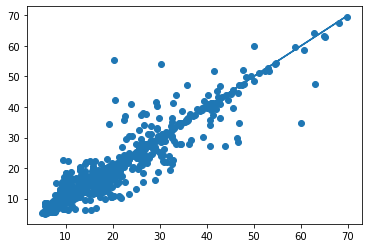

In [9]:
# from sklearn.neighbors import KNeighborsRegressor
# knr = KNeighborsRegressor(n_neighbors = 2, weights = "distance", p = 1)
# knr.fit(X_train, y_train)

# print(knr.score(X_test, y_test))

# prediction = knr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RadiusNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\neighbors\_regression.py:474: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


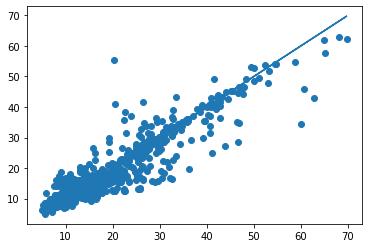

In [10]:
# from sklearn.neighbors import RadiusNeighborsRegressor
# rnr = RadiusNeighborsRegressor(radius = 4, weights = "distance", p = 1)
# rnr.fit(X_train, y_train)

# # print(rnr.score(X_test, y_test))

# prediction = rnr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

0.025112878316540854


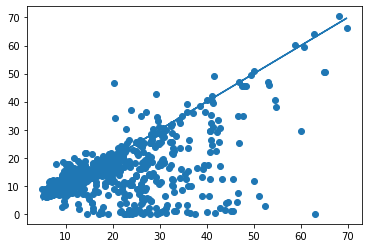

In [11]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# gpr = GaussianProcessRegressor(alpha = 0.01, random_state = 0)
# gpr.fit(X_train, y_train)

# print(gpr.score(X_test, y_test))

# prediction = gpr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

0.9278139703209385


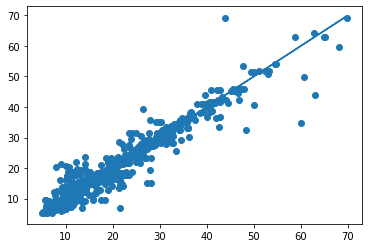

In [12]:
# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor(random_state = 0, criterion = "absolute_error", min_samples_split = 5)
# dtr.fit(X_train, y_train)

# print(dtr.score(X_test, y_test))

# prediction = dtr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

0.9519139372541012


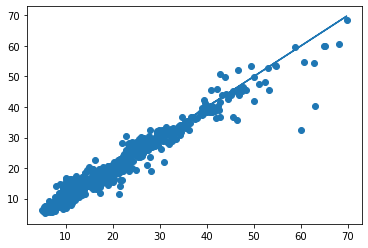

In [13]:
# from sklearn.ensemble import RandomForestRegressor
# rfr = RandomForestRegressor(random_state = 0, n_estimators = 80, criterion = "absolute_error")
# rfr.fit(X_train, y_train)

# print(rfr.score(X_test, y_test))

# prediction = rfr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

0.8988386013641855


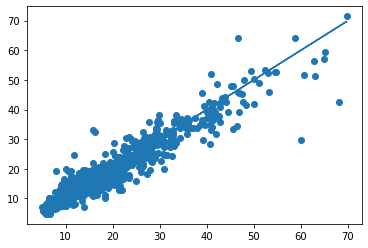

In [14]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor(random_state = 0, loss = "squared_error",
#                                 n_estimators = 500, learning_rate = 0.5)
# gbr.fit(X_train, y_train)

# print(gbr.score(X_test, y_test))

# prediction = gbr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

0.9565681564198816


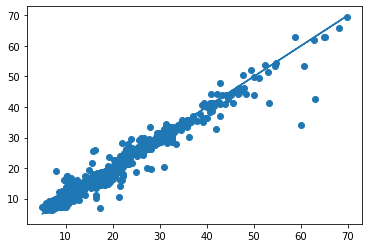

In [15]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# abr = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 10, criterion = "absolute_error"),
#                         random_state = 0, n_estimators = 100, loss = "exponential")
# abr.fit(X_train, y_train)

# print(abr.score(X_test, y_test))

# prediction = abr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)